<a href="https://colab.research.google.com/github/Mohamedragih1/Stanford-Sentiment-Treebank-SST-Text-Classification/blob/main/naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOADING THE SST DATASET FROM HUGGING FACE WEBSITE**

In [64]:
pip install datasets

In [65]:
import datasets

sst_dataset = datasets.load_dataset("sst")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for sst contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sst
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


**REMOVING UNNECCEASSARY FEATURES FROM THE SST DATASET**

In [66]:
print("SST Dataset: ",sst_dataset)
removed_columns = ["tokens", "tree"]
sst_dataset = sst_dataset.remove_columns(removed_columns)
print()
print("SST Dataset: ",sst_dataset)

SST Dataset:  DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'label', 'tokens', 'tree'],
        num_rows: 2210
    })
})

SST Dataset:  DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'label'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2210
    })
})


**CREATING A FUNCTION THAT MAPS NUMERICAL LABELS TO CATEGORIES**

In [67]:
def rangeToCat(value):
    mappingFn = {
        (0, 0.2): 0,
        (0.2, 0.4): 1,
        (0.4, 0.6): 2,
        (0.6, 0.8): 3,
        (0.8, 1.0): 4
    }

    for range_, category in mappingFn.items():
        if range_[0] <= value <= range_[1]:
            return category
    else:
        return "Undefined range!"

**SPLITTING TRAIN, TEST AND VALIDATION SETS**

In [68]:
train = sst_dataset["train"]
test = sst_dataset["test"]
validation = sst_dataset["validation"]

**MAPPING TRAINIG LABELS TO CORESSPONDING CATEGORIES**

In [69]:
import numpy as np
train_labels = train["label"]
listaya = []
for label in train_labels:
  listaya.append(rangeToCat(label))

**MAPPING TEST LABELS TO CORESSPONDING CATEGROIES**

In [70]:
test_labels = test["label"]
list2 = []
for label in test_labels:
  list2.append(rangeToCat(label))

**ALGORITHM: MULTINOMIAL NAIVE BAYES IMPLEMENTATION**

In [71]:
class multinomialNaiveBayes:

    def fit(self, X, Y, vocab):
        X = np.array(X)
        Y = np.array(Y)
        Documents = X.shape[0]
        self.classes, documentsPerClass = np.unique(Y, return_counts=True)

        # Computing prior probabilities P(C)
        self.prior = np.zeros(len(self.classes))
        for idx, Class in enumerate(self.classes):
            self.prior[idx] = np.log(documentsPerClass[idx] / Documents)

        # Creating an array of mega documents for each class
        self.megaDocuments = np.zeros((len(self.classes), len(vocab)))
        for idx, Class in enumerate(self.classes):
            for doc_idx, (x, y) in enumerate(zip(X, Y)):
                if y == Class:
                    for word_idx, word in enumerate(vocab):
                        if word in x.split():
                            self.megaDocuments[idx][word_idx] += 1

        # Calculating likelihood probabilities P(W|C) with Laplace smoothing
        self.likelihood = np.zeros((len(vocab), len(self.classes)))
        for idx, word in enumerate(vocab):
            for idx2, Class in enumerate(self.classes):
                self.likelihood[idx][idx2] = np.log((self.megaDocuments[idx2][idx] + 1) /
                                                    (np.sum(self.megaDocuments[idx2]) + len(vocab)))

        return self.prior, self.likelihood, vocab

    def predict(self, X, vocab):
        sums = np.zeros(len(self.classes))
        vocabList = np.array(list(vocab.keys()))  # Convert to list for indexing
        for idx, Class in enumerate(self.classes):
            sums[idx] += self.prior[idx]
            words = X.split()

            for word in words:
                if word in vocabList:
                    wordIndex = np.where(vocabList == word)[0]  # Get the first index
                    sums[idx] += self.likelihood[wordIndex, idx]  # Correct indexing

        return self.classes[np.argmax(sums)]


**PERFORMING COUNT VECTORIZER ON THE DATASET**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
import string

def custom_tokenizer(text):
    text_no_punctuation = "".join([char for char in text if char not in string.punctuation])
    tokens = text_no_punctuation.split()
    return tokens

count_vectorizer = CountVectorizer(
    stop_words="english",
    token_pattern=r'\b\w\w+\b',
    tokenizer=custom_tokenizer,
    lowercase=True
)

train_text = count_vectorizer.fit(train["sentence"])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [73]:
vocab = train_text.vocabulary_

**PREDICTING TO UNSEEN DATA USING THE IMPLEMENTED MULTINOMIAL NAIVE BAYES MODEL**

In [74]:
model = multinomialNaiveBayes()
model.fit(train["sentence"], listaya, vocab)

(array([-2.0572184 , -1.34862339, -1.66033704, -1.3028004 , -1.89213865]),
 array([[ -9.38210641,  -8.96443983, -10.18693567,  -8.79603632,
          -8.7524234 ],
        [-10.0752536 , -10.35073419, -10.18693567,  -8.79603632,
         -10.13871776],
        [ -9.38210641, -10.35073419,  -9.49378849,  -9.01917987,
         -10.13871776],
        ...,
        [-10.0752536 , -10.35073419, -10.18693567, -10.40547423,
         -10.13871776],
        [ -9.38210641, -10.35073419, -10.18693567, -10.40547423,
         -10.13871776],
        [ -9.38210641, -10.35073419, -10.18693567, -10.40547423,
         -10.13871776]]),
 {'rock': 11930,
  'destined': 3796,
  '21st': 92,
  'century': 2273,
  's': 12088,
  'new': 9519,
  'conan': 2871,
  'going': 6085,
  'make': 8622,
  'splash': 13347,
  'greater': 6221,
  'arnold': 895,
  'schwarzenegger': 12281,
  'jeanclaud': 7679,
  'van': 15338,
  'damme': 3450,
  'steven': 13564,
  'segal': 12412,
  'gorgeously': 6134,
  'elaborate': 4528,
  'continua

In [75]:
predict_array = np.zeros(len(test["sentence"]))
for i in range (0, len(test["sentence"])-1):
  predict_array[i] = model.predict(test["sentence"][i], vocab)

<ipython-input-71-1f711e98af23>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sums[idx] += self.likelihood[wordIndex, idx]  # Correct indexing


In [76]:
from sklearn.metrics import accuracy_score
print(f" Accuracy : {accuracy_score(list2, predict_array)*100}")

 Accuracy : 39.321266968325794


**USING SKLEARN NAIVE BAYES MODEL**

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train["sentence"], listaya)
y_pred = model.predict(test["sentence"])

In [78]:
print(f" Accuracy : {accuracy_score(list2, y_pred)*100}")

 Accuracy : 40.90497737556561


**IMPLEMENTING FUNCTION TO CALCULATE PERFORMANCE METRICS FOR THE MODEL**


In [79]:
import numpy as np

def generateConfusionMatrix(predicted_labels, gold_labels):
    predicted_labels = np.array(predicted_labels)
    gold_labels = np.array(gold_labels)
    classes = np.unique(gold_labels)
    n = len(classes)
    label_to_index = {label: i for i, label in enumerate(classes)}  # Map labels to integer indices
    confusionMatrix = np.zeros((n, n))

    for gold_label, predicted_label in zip(gold_labels, predicted_labels):
        gold_index = label_to_index[gold_label]
        predicted_index = label_to_index[predicted_label]
        confusionMatrix[gold_index, predicted_index] += 1

    return confusionMatrix


In [80]:
result = generateConfusionMatrix(predict_array, list2)
print("Confusion Matrix is as following: ",result)

Confusion Matrix is as following:  [[ 32. 169.  19.  54.   5.]
 [ 30. 368.  53. 164.  18.]
 [ 13. 147.  42. 168.  19.]
 [  7.  91.  26. 341.  45.]
 [  3.  46.  13. 251.  86.]]


**functions for calculating precision, recall, F-score, macroaverage score**

In [81]:
def performance(confusionMatrix):

  n = confusionMatrix.shape[0] #numberOfClasses
  precision = np.zeros(n)
  recall = np.zeros(n)
  f1_score = np.zeros(n)
  for i in range (0,n):
    precision[i] = confusionMatrix[i][i] / np.sum(confusionMatrix[:, i])
    recall[i] = confusionMatrix[i][i] / np.sum(confusionMatrix[i,:])
    f1_score[i] = 2*precision[i]*recall[i] / precision[i] + recall[i]

  macroaveraged_precision = np.sum(precision) / n
  macroaveraged_recall = np.sum(recall) / n
  macroaveraged_f1 = np.sum(f1_score) / n

  return precision, recall, f1_score, macroaveraged_precision, macroaveraged_recall, macroaveraged_f1

In [82]:
precision, recall, f1, macroP, macroR, macroF1 = performance(result)
print(f"precision: {precision}\n")
print(f"recall: {recall}\n")
print(f"f1_score: {f1}\n")
print(f"macroaveraged Precision: {macroP}\n")
print(f"macroaveraged recall: {macroR}\n")
print(f"macroaveraged f1_score: {macroF1}\n")


precision: [0.37647059 0.44823386 0.2745098  0.34867076 0.49710983]

recall: [0.11469534 0.58135861 0.10796915 0.66862745 0.21553885]

f1_score: [0.34408602 1.74407583 0.32390746 2.00588235 0.64661654]

macroaveraged Precision: 0.388998967307524

macroaveraged recall: 0.3376378800131117

macroaveraged f1_score: 1.012913640039335



**FUNCTION FOR PLOTTING THE CONFUSION MATRIX**

In [83]:
import matplotlib.pyplot as plt
def plotMatrix(confusion_matrix):
  plt.imshow(confusion_matrix, cmap='viridis')
  for i in range(confusion_matrix.shape[0]):
      for j in range(confusion_matrix.shape[1]):
          plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')

  plt.colorbar(label='Count')
  plt.xlabel('Predicted Label')
  plt.ylabel('Gold Label')
  plt.title('Confusion Matrix')
  plt.show()

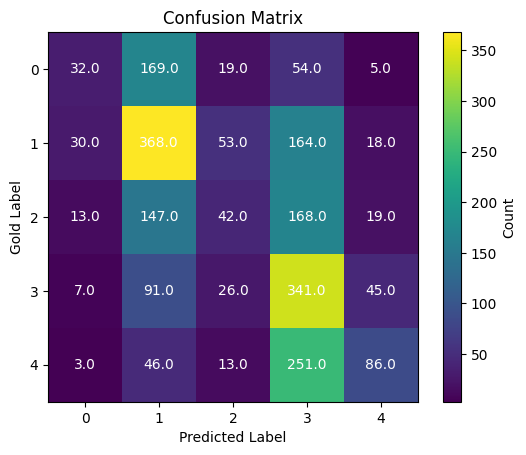

In [84]:
plotMatrix(result)

**USING SKLEARN FUNCTIONS TO CALCULATE PERFORMANCE METRCIS FOR THE MODEL**

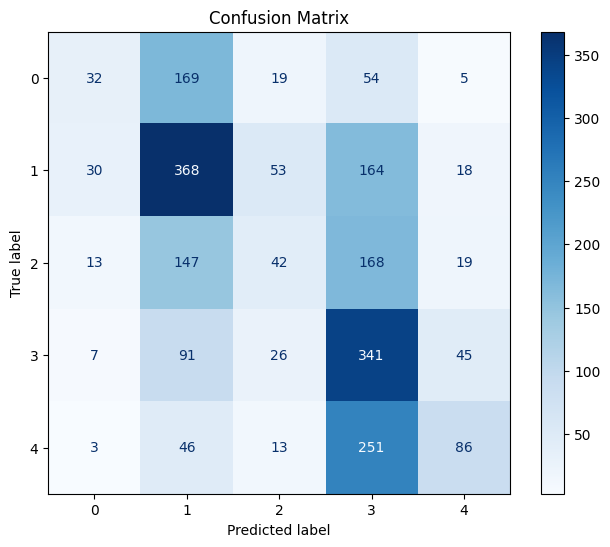

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(list2, predict_array)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(list2, predict_array, average='macro')  # or 'micro', 'weighted', 'samples', 'macro'
recall = recall_score(list2, predict_array, average='macro')
f1 = f1_score(list2, predict_array, average='macro')
print(f"precision: {precision}\n")
print(f"recall: {recall}\n")
print(f"f1_score: {f1}\n")

precision: 0.388998967307524

recall: 0.3376378800131117

f1_score: 0.31920563617105036

